In [6]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import glob
import pandas as pd
from scipy.io import arff
import logging
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
from tools.clustering.fuzzy_cmeans import FuzzyCMeansParamsGrid
from tools.config import DATA_DIR, CLUSTERED_DATA_DIR

# Set up logger
logger = logging.getLogger(__name__)

In [7]:
CLUSTERED_DATA_DIR
model_name = 'fuzzy_cmeans'
dataset_name = 'synthetic'

In [8]:
SCRIPT_DIR = pathlib.Path(os.getcwd()).absolute()
DATA_DIR = os.path.join(SCRIPT_DIR.parent, "data")
PREPROCESSED_DATA_DIR = f'{DATA_DIR}/1_preprocessed/'

In [9]:
data_path = f"{DATA_DIR}/1_preprocessed/synthetic.csv"
df  = pd.read_csv(data_path)
df['class'].unique()


array([1, 2, 4, 3, 0])

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

METRICS_FILE_PATH = f"{DATA_DIR}/3_metrics.csv"
data = pd.read_csv(METRICS_FILE_PATH)

# Ensure numerical columns are properly parsed (if needed)
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')
data['ari'] = pd.to_numeric(data['ari'], errors='coerce')
data['purity'] = pd.to_numeric(data['purity'], errors='coerce')
data['dbi'] = pd.to_numeric(data['dbi'], errors='coerce')
data['f_measure'] = pd.to_numeric(data['f_measure'], errors='coerce')

data

,dataset,model,runtime,ari,purity,dbi,f_measure,n_clusters,fuzzyness,max_iterations,...,random_state,strictness,min_obs,max_depth,metric,algorithm,n_neighbors,affinity,eigen_solver,assign_labels
0,hepatitis,fuzzy_cmeans,0.002671,0.047810,0.316129,2.029871,0.083925,10.0,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hepatitis,fuzzy_cmeans,0.011547,0.045040,0.245161,2.081026,0.084667,10.0,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hepatitis,fuzzy_cmeans,0.006676,0.087688,0.329032,1.879722,0.100027,10.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hepatitis,fuzzy_cmeans,0.006717,0.034207,0.212903,2.189391,0.076966,10.0,3.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hepatitis,fuzzy_cmeans,0.009183,0.038980,0.251613,1.929497,0.079825,10.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,vowel,spectral_clustering,0.049719,0.028985,0.303030,4.249091,0.146672,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,nearest_neighbors,lobpcg,kmeans
2797,vowel,spectral_clustering,0.358995,-0.006860,0.266667,1.230998,0.071318,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,rbf,arpack,cluster_qr
2798,vowel,spectral_clustering,0.491837,-0.006860,0.266667,1.230998,0.071318,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,rbf,arpack,kmeans
2799,vowel,spectral_clustering,0.086160,-0.006860,0.266667,1.230998,0.071318,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,rbf,lobpcg,cluster_qr


In [11]:
def plot_model_comparisons(data, metric, title):
    """
    Plot comparisons of models across datasets based on a given metric.
    
    Args:
        data (pd.DataFrame): The dataset containing performance metrics.
        metric (str): The metric to visualize (e.g., 'ari', 'purity').
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=data, 
        x='dataset', 
        y=metric, 
        hue='model', 
        ci='sd', 
        palette='viridis'
    )
    plt.title(title, fontsize=14)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.legend(title='Model', fontsize=10, loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [18]:
def plot_heatmaps(data):
    pivot_table = data.pivot_table(
        index='model', columns='dataset', values='ari', aggfunc='mean'
    )
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title('ARI Heatmap Across Models and Datasets')
    plt.show()


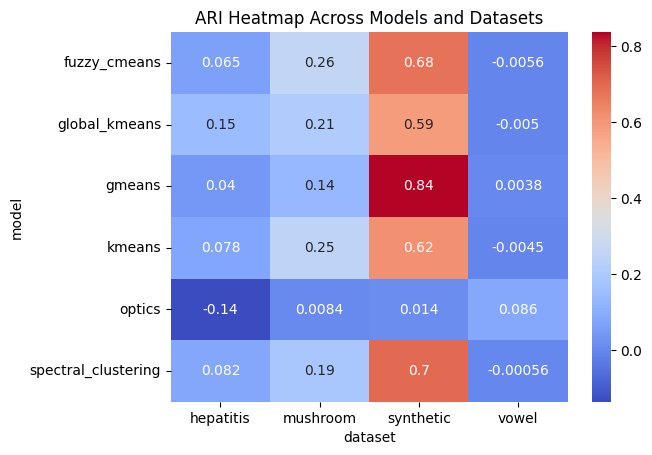

In [19]:
plot_heatmaps(data)

In [16]:

def plot_pairplot(data):
    sns.pairplot(data, vars=['ari', 'purity', 'dbi', 'f_measure'], hue='model')
    plt.show()


/tmp/ipykernel_66421/637982909.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


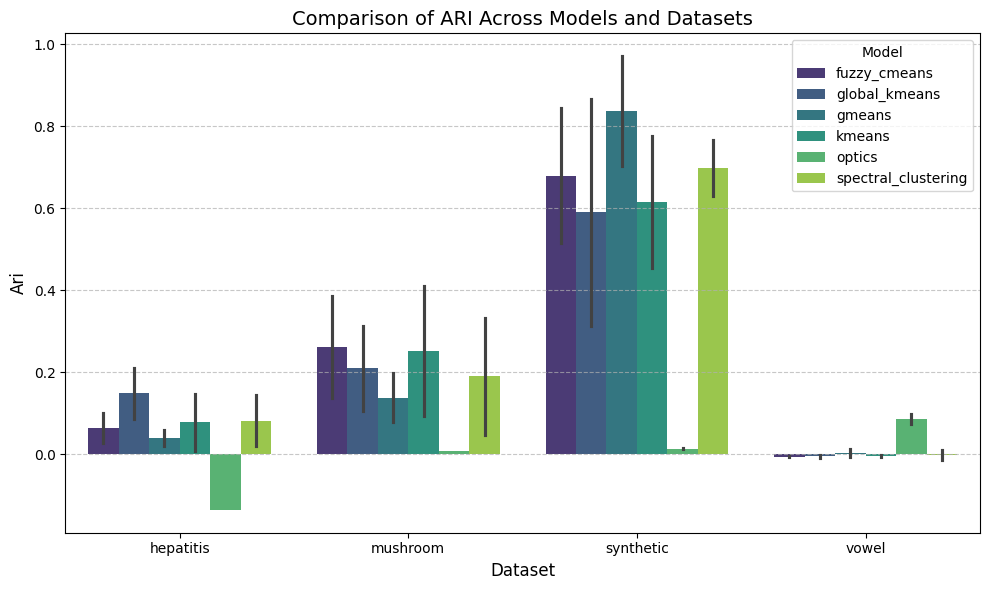

In [ ]:
# Compare ARI
plot_model_comparisons(data, 'ari', 'Comparison of ARI Across Models and Datasets')

/tmp/ipykernel_66421/637982909.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


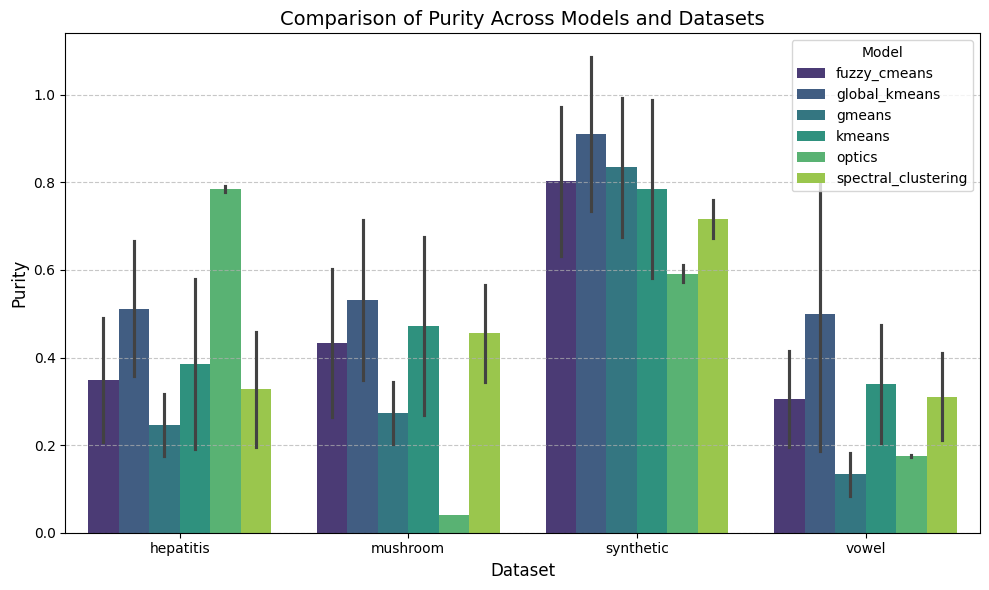

In [13]:
# Compare Purity
plot_model_comparisons(data, 'purity', 'Comparison of Purity Across Models and Datasets')



/tmp/ipykernel_66421/637982909.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


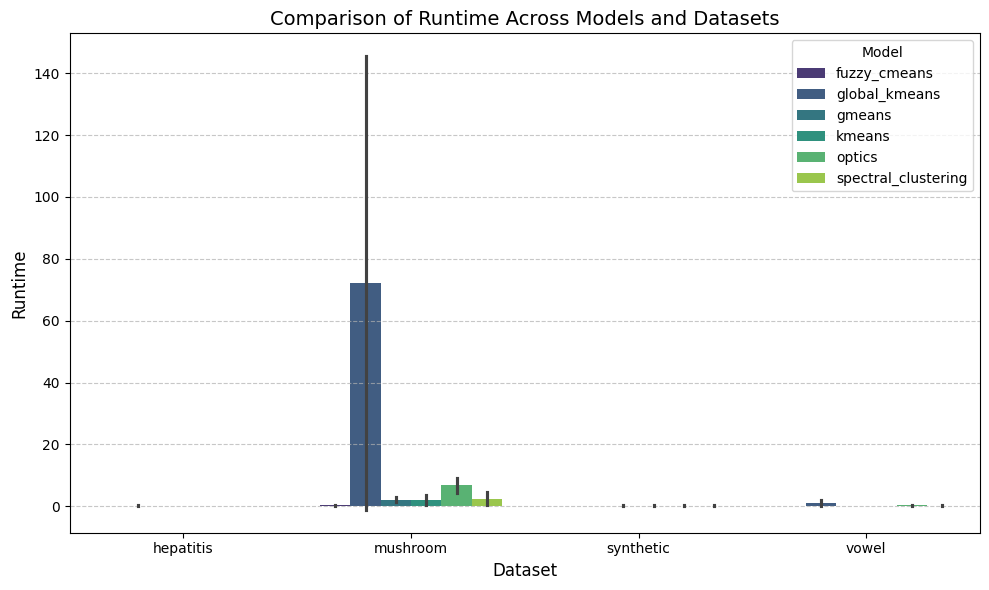

In [14]:
# Compare Runtime
plot_model_comparisons(data, 'runtime', 'Comparison of Runtime Across Models and Datasets')


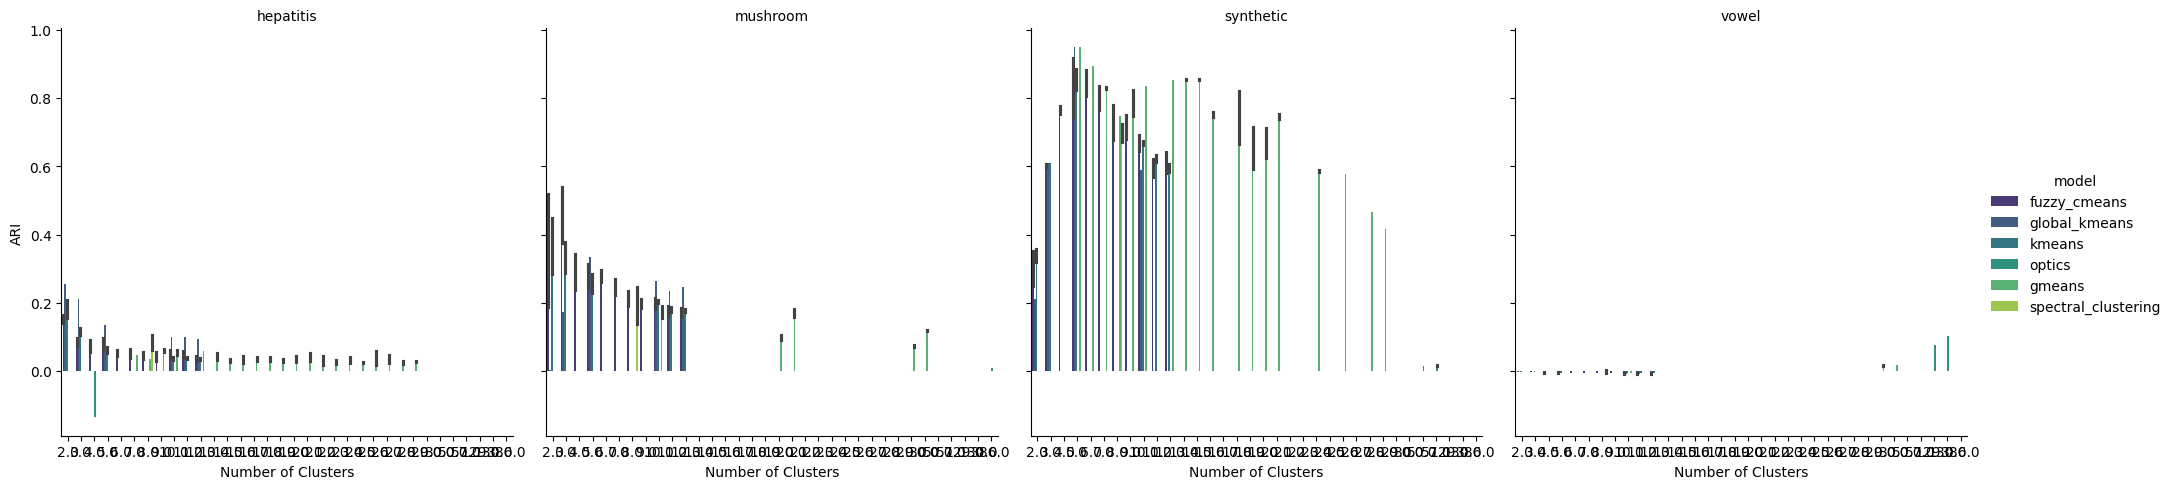

In [20]:
def compare_clustering_params(data):
    g = sns.catplot(
        data=data, 
        x='n_clusters', 
        y='ari', 
        hue='model', 
        col='dataset', 
        kind='bar', 
        palette='viridis'
    )
    g.set_titles("{col_name}")
    g.set_axis_labels("Number of Clusters", "ARI")
    plt.show()

compare_clustering_params(data)